In [27]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [49]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [50]:
y.shape, tx.shape

((202,), (202, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [75]:
def compute_loss(y, tx, w, mae=False):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    preds = tx.dot(w)
    if mae:
        return mae(y, preds)
    else:
        return mse(y, preds)

def mse(y, preds):
    """
    :param y: True values of y.
    :param tx: Input values of x.
    :param w: Weights.
    :return: Mean square error between the predicted and true labels.
    """
    
    return 1/2 * np.mean((y - preds)**2)

def mae(y, preds):
    """
    :param y: True values of y.
    :param tx: Input values of x.
    :param w: Weights.
    :return: Mean absolute error between the predicted and true labels.
    """
    
    return np.mean(np.abs(y - preds))



# 2 Grid Search

Fill in the function `grid_search()` below:

In [76]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # INSERT YOUR CODE HERE
    for i, w0_i in enumerate(w0):
        for j, w1_j in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.array([w0_i, w1_j]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.956595728172087, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.004 seconds


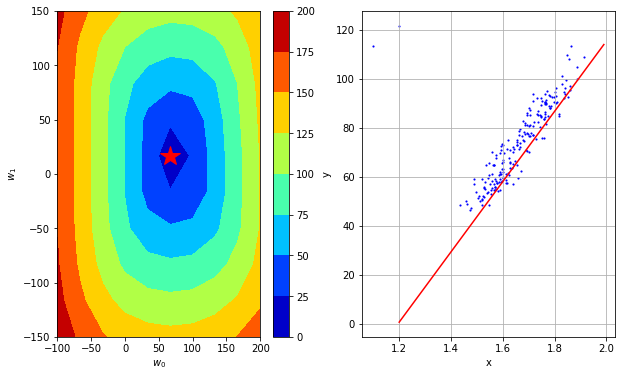

In [77]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [90]:
def compute_gradient(y, tx, w, subgradient = False):
    """Compute the gradient."""
    if subgradient:
        return compute_subgradient_mae(y, tx, w)
    else:
        return compute_gradient_mse(y, tx, w)

def compute_gradient_mse(y, tx, w):
    pred = np.dot(tx, w)
    e = y - pred
    N = e.shape[0]
    gradient = -1/N * np.matmul(tx.T, e)
    return gradient


def compute_subgradient_mae(y, tx, w):
    e = y - tx.dot(w)
    N = len(e)
    grad = -1/N * tx.T @ np.sign(e)
    return grad

Please fill in the functions `gradient_descent` below:

In [91]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        mae = True
        loss = compute_loss(y, tx, w, mae=mae)
        gradient = compute_gradient(y, tx, w, subgradient=mae)
        # ***************************************************

        # ***************************************************
        w = w - gamma * gradient
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [92]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.25

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=74.06780585492638, w0=0.25000000000000017, w1=2.723515857283587e-16
Gradient Descent(1/499): loss=73.81780585492638, w0=0.5000000000000003, w1=5.447031714567174e-16
Gradient Descent(2/499): loss=73.56780585492638, w0=0.7500000000000004, w1=8.170547571850761e-16
Gradient Descent(3/499): loss=73.31780585492638, w0=1.0000000000000007, w1=1.0894063429134349e-15
Gradient Descent(4/499): loss=73.06780585492638, w0=1.2500000000000009, w1=1.3617579286417936e-15
Gradient Descent(5/499): loss=72.81780585492638, w0=1.500000000000001, w1=1.6341095143701523e-15
Gradient Descent(6/499): loss=72.56780585492638, w0=1.7500000000000013, w1=1.906461100098511e-15
Gradient Descent(7/499): loss=72.31780585492638, w0=2.0000000000000013, w1=2.1788126858268697e-15
Gradient Descent(8/499): loss=72.06780585492638, w0=2.2500000000000013, w1=2.4511642715552284e-15
Gradient Descent(9/499): loss=71.81780585492638, w0=2.5000000000000013, w1=2.723515857283587e-15
Gradient Descent(10/499):

In [93]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [86]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    #   Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, batch_size=batch_size):
            loss = compute_loss(y, tx, w)
            gradient = compute_stoch_gradient(batch_y, batch_x, w)
            w = w - gamma * gradient

        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [89]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.25
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/499): loss=74.06780585492638, w0=0.25, w1=-0.028862251960253948
Stochastic Gradient Descent(1/499): loss=73.81780585492638, w0=0.5, w1=-0.3212402411765497
Stochastic Gradient Descent(2/499): loss=73.56780585492638, w0=0.75, w1=-0.09582404832124522
Stochastic Gradient Descent(3/499): loss=73.31780585492638, w0=1.0, w1=-0.39633065893765407
Stochastic Gradient Descent(4/499): loss=73.06780585492638, w0=1.25, w1=-0.4356785578236328
Stochastic Gradient Descent(5/499): loss=72.81780585492638, w0=1.5, w1=-0.8062193413284687
Stochastic Gradient Descent(6/499): loss=72.56780585492638, w0=1.75, w1=-0.736096272215173
Stochastic Gradient Descent(7/499): loss=72.31780585492638, w0=2.0, w1=-0.6367652119288559
Stochastic Gradient Descent(8/499): loss=72.06780585492638, w0=2.25, w1=-0.42522308290450656
Stochastic Gradient Descent(9/499): loss=71.81780585492638, w0=2.5, w1=-0.23801574310032148
Stochastic Gradient Descent(10/499): loss=71.56780585492638, w0=2.75, w1=-0.4726

In [88]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [74]:
def compute_subgradient(y, tx, w):
    e = y - tx.dot(w)
    grad = -tx.T.dot(np.sign(e)) / len(e)
    return grad

def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        subgradient = compute_subgradient(y, tx, w)
        w = w - gamma * subgradient
        ws.append(w)
        losses.append(loss)
        print("Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws